In [2]:
import pandas as pd
import numpy as np
import random


np.random.seed(42)


provinces = ['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'Eastern Cape', 'Limpopo',
             'Mpumalanga', 'Free State', 'North West', 'Northern Cape']
genders = ['Male', 'Female', 'Other']


n_samples = 1000

data = {
    'age': np.random.randint(15, 36, n_samples),
    'gender': np.random.choice(genders, n_samples),
    'province': np.random.choice(provinces, n_samples),
    'sleep_hours': np.round(np.random.normal(6.5, 1.5, n_samples), 1),
    'screen_time': np.round(np.random.normal(6, 2, n_samples), 1),
    'exercise_days': np.random.randint(0, 8, n_samples),
    'has_social_support': np.random.choice(['Yes', 'No'], n_samples, p=[0.7, 0.3]),
    'food_insecurity': np.random.choice(['Yes', 'No'], n_samples, p=[0.4, 0.6]),
    'financial_stress_level': np.random.randint(0, 11, n_samples),
    'academic_or_job_pressure': np.random.choice(['Yes', 'No'], n_samples, p=[0.6, 0.4]),
    'relationship_issues': np.random.choice(['Yes', 'No'], n_samples, p=[0.5, 0.5]),
    'mental_health_awareness': np.random.choice(['Yes', 'No'], n_samples, p=[0.5, 0.5]),
}

df = pd.DataFrame(data)


def assign_needs_support(row):
    score = 0
    if row['sleep_hours'] < 6:
        score += 1
    if row['screen_time'] > 8:
        score += 1
    if row['exercise_days'] < 2:
        score += 1
    if row['has_social_support'] == 'No':
        score += 2
    if row['food_insecurity'] == 'Yes':
        score += 2
    if row['financial_stress_level'] > 7:
        score += 2
    if row['academic_or_job_pressure'] == 'Yes':
        score += 1
    if row['relationship_issues'] == 'Yes':
        score += 1

    return 'Yes' if score >= 5 else 'No'

df['needs_support'] = df.apply(assign_needs_support, axis=1)


print(df.head())


   age  gender      province  sleep_hours  screen_time  exercise_days  \
0   21  Female  Western Cape          5.3          4.9              0   
1   34  Female       Gauteng          6.2          2.1              7   
2   29   Other    Free State          5.2          5.0              6   
3   25  Female    Free State          6.9          6.7              5   
4   22    Male  Western Cape          6.7          6.5              6   

  has_social_support food_insecurity  financial_stress_level  \
0                Yes              No                       2   
1                 No             Yes                      10   
2                 No              No                       4   
3                Yes             Yes                       0   
4                Yes              No                       2   

  academic_or_job_pressure relationship_issues mental_health_awareness  \
0                      Yes                  No                     Yes   
1                      Yes  

Dataset shape: (1000, 13)

Column types:
 age                           int32
gender                       object
province                     object
sleep_hours                 float64
screen_time                 float64
exercise_days                 int32
has_social_support           object
food_insecurity              object
financial_stress_level        int32
academic_or_job_pressure     object
relationship_issues          object
mental_health_awareness      object
needs_support                object
dtype: object

Sample data:
    age  gender      province  sleep_hours  screen_time  exercise_days  \
0   21  Female  Western Cape          5.3          4.9              0   
1   34  Female       Gauteng          6.2          2.1              7   
2   29   Other    Free State          5.2          5.0              6   
3   25  Female    Free State          6.9          6.7              5   
4   22    Male  Western Cape          6.7          6.5              6   

  has_social_support f

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16564\3277076099.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='needs_support', palette='Set2')


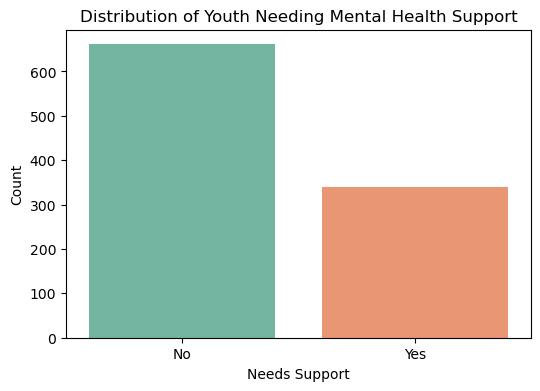

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Dataset shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nSample data:\n", df.head())


print("\nMissing values:\n", df.isnull().sum())


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='needs_support', palette='Set2')
plt.title("Distribution of Youth Needing Mental Health Support")
plt.ylabel("Count")
plt.xlabel("Needs Support")
plt.show()


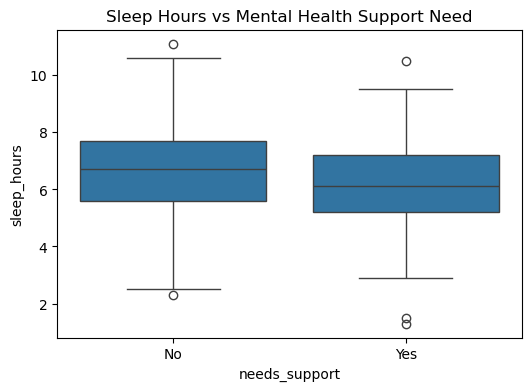

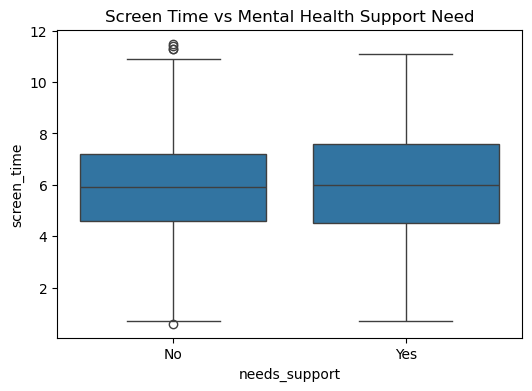

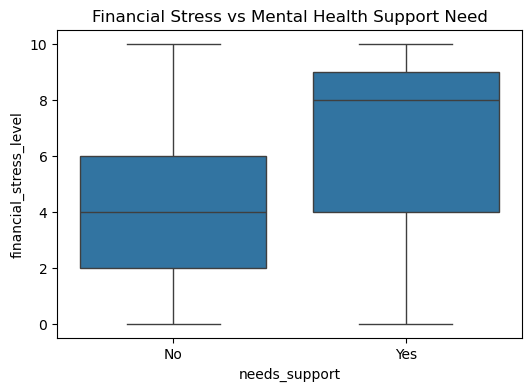

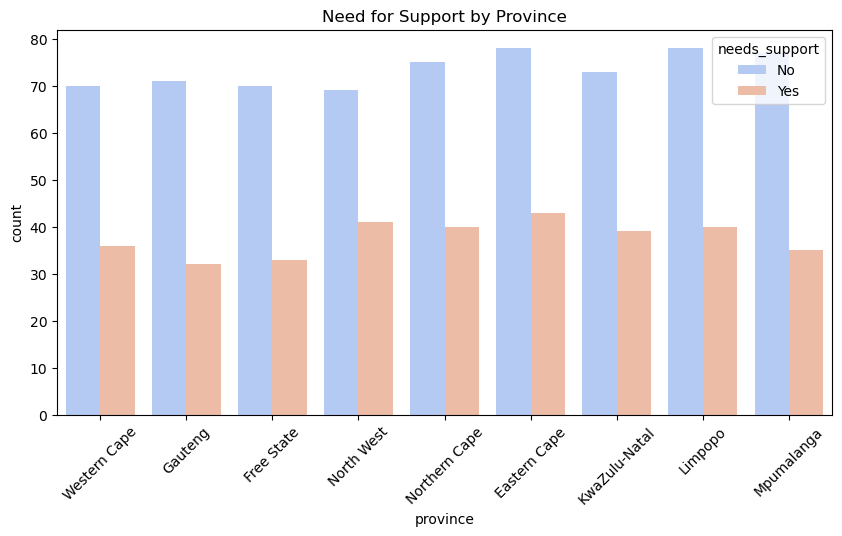

In [4]:

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='needs_support', y='sleep_hours')
plt.title("Sleep Hours vs Mental Health Support Need")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='needs_support', y='screen_time')
plt.title("Screen Time vs Mental Health Support Need")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='needs_support', y='financial_stress_level')
plt.title("Financial Stress vs Mental Health Support Need")
plt.show()


plt.figure(figsize=(10,5))
sns.countplot(data=df, x='province', hue='needs_support', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Need for Support by Province")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


data = df.copy()


binary_columns = ['has_social_support', 'food_insecurity', 'academic_or_job_pressure',
                  'relationship_issues', 'mental_health_awareness', 'needs_support']

for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


data = pd.get_dummies(data, columns=['gender', 'province'], drop_first=True)


X = data.drop('needs_support', axis=1)
y = data['needs_support']


numeric_cols = ['age', 'sleep_hours', 'screen_time', 'exercise_days', 'financial_stress_level']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800, 20)
Test set shape: (200, 20)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:

[[130  11]
 [  9  50]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       141
           1       0.82      0.85      0.83        59

    accuracy                           0.90       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.90      0.90      0.90       200



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:

[[133   8]
 [  3  56]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       141
           1       0.88      0.95      0.91        59

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



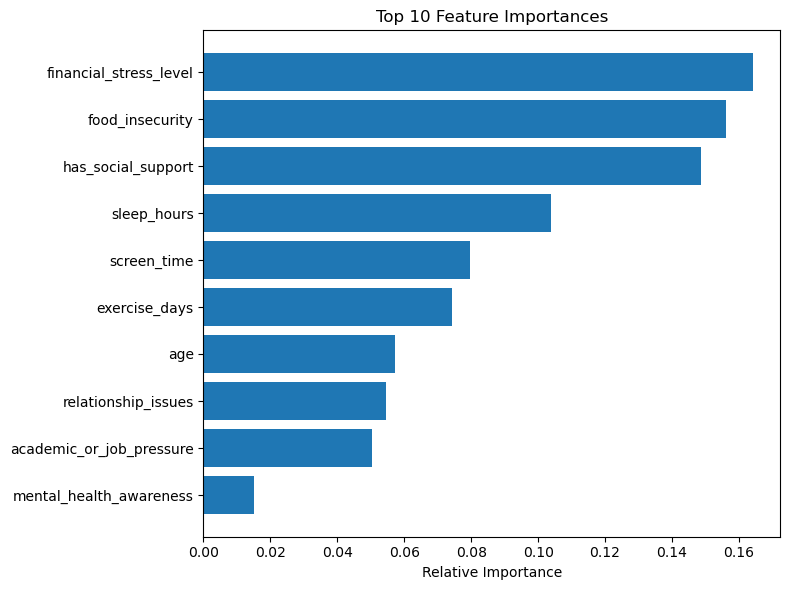

In [9]:
import numpy as np


importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features


plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()
